# KickStarter campaign success predict

In the following text, we will be taking a closer look at a KickStarter's campaign success prediction based on the Kaggle database

In [39]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train_clean.csv')

df.head()
df['country'].replace('US', 'USA', inplace=True)
df['country'].replace('GB', 'GBR', inplace=True)
df['country'].replace('CA', 'CAN', inplace=True)
df['country'].replace('AU', 'AUS', inplace=True)
df['country'].replace('NL', 'NLD', inplace=True)
df['country'].replace('NZ', 'NZL', inplace=True)
df['country'].replace('SE', 'SWE', inplace=True)
df['country'].replace('DK', 'DNK', inplace=True)
df['country'].replace('NO', 'NOR', inplace=True)
df['country'].replace('IE', 'IRL', inplace=True)
df['country'].replace('DE', 'DEU', inplace=True)
df[['country','goal','backers_count','final_status']].to_csv('country.csv', index = None, header=True)

## Numeric exploratory analysis

In [9]:
#Reformat the columns that need to be :
df['name'] = df['name'].astype(str)
df['desc'] = df['desc'].astype(str)
df['keywords'] = df['keywords'].astype(str)
df['goal'] = df['goal'].astype(int)
df['deadline'] = pd.to_datetime(df['deadline'])
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'])
df['launched_at'] = pd.to_datetime(df['launched_at'])

df['length_name'] = df['name'].astype(str).apply(len)
df['length_descr'] = df['desc'].astype(str).apply(len)
df['length_key']  = df['keywords'].astype(str).apply(len)

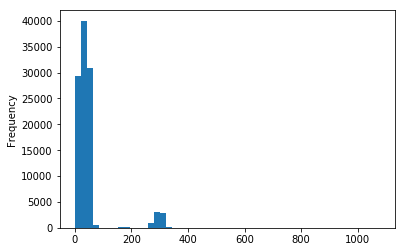

In [10]:
df['length_name'].plot(bins=50, kind='hist')
# Distribution de la longueur du nom de la campagne

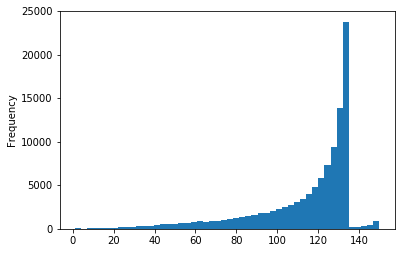

In [11]:
df['length_descr'].plot(bins=50, kind='hist')
# Distribution de la longueur de la description

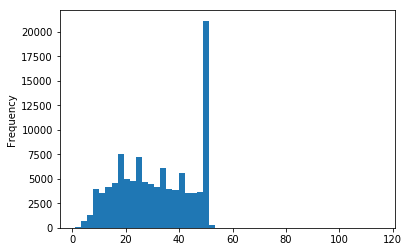

In [12]:
df['length_key'].plot(bins=50, kind='hist')
# Distribution de la longueur des mots clés de la campagne

0         20
1        300
2         30
3        500
4       2000
5        700
6        250
7       1000
8       5000
9       3500
10     30000
11       300
12      1500
13       500
14       500
15      1000
16       600
17      1500
18      3500
19      1000
20       365
21       500
22       400
23       100
24       250
25      3000
26       640
27      3500
28       300
29      1000
       ...  
70      5000
71     10000
72    325000
73      6000
74      5000
75      3500
76     10000
77      8000
78      3000
79       800
80     15000
81      3200
82      8175
83       200
84      2000
85      3500
86      4500
87     10000
88     10000
89      5000
90      5000
91     10000
92      3000
93      3500
94       300
95      3000
96      5000
97      7500
98      3000
99      3500
Name: goal, Length: 100, dtype: int64

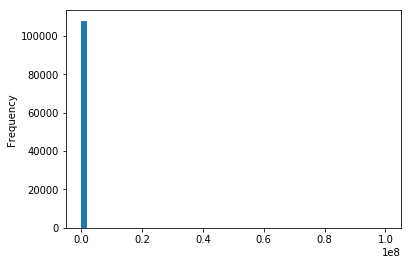

In [14]:
df['goal'].plot(bins=50, kind='hist')
df['goal'].head(100)
# Distribution des objectifs financiers d'une campagne

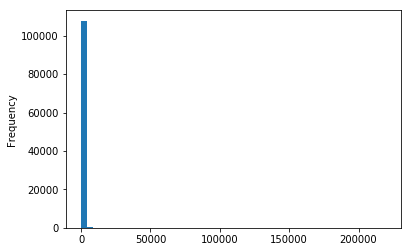

In [15]:
df['backers_count'].plot(bins=50, kind='hist')
# Distribution du nombre de backers par campagne

###### The name of a project seems to be as small as possible, whereas descriptions and keywords tend to be really long

In [32]:
# Première approche : Nombre de succès vs nombre d'échecs
df['final_status'].value_counts()
success_rate = df['final_status'].sum()/len(df['final_status'])*100
print("The success rate is : " + str(round(success_rate,2)) +" %.")

The success rate is : 31.96 %.


In [18]:
df['disable_communication'].value_counts()

False    107806
True        323
Name: disable_communication, dtype: int64

In [19]:
df['country'].value_counts()

US    92033
GB     8758
CA     3736
AU     1880
NL      705
NZ      355
SE      240
DK      196
NO      114
IE      111
DE        1
Name: country, dtype: int64

In [20]:
df['currency'].value_counts()

USD    92033
GBP     8758
CAD     3736
AUD     1880
EUR      817
NZD      355
SEK      240
DKK      196
NOK      114
Name: currency, dtype: int64

In [72]:
#Correlation matrix
df.corr()

,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,length_name,length_descr,length_key
goal,1.000000,-0.000602,0.021468,0.021179,0.020937,0.020859,0.008733,-0.018984,-0.002610,-0.004022,-0.011041
disable_communication,-0.000602,1.000000,0.046417,0.043782,0.048588,0.046166,-0.003294,-0.037517,-0.005603,-0.012580,-0.011193
deadline,0.021468,0.046417,1.000000,0.999930,0.984109,0.999674,0.005281,-0.123052,-0.125559,-0.052281,-0.086550
state_changed_at,0.021179,0.043782,0.999930,1.000000,0.984029,0.999641,0.005501,-0.121628,-0.125682,-0.051946,-0.086427
created_at,0.020937,0.048588,0.984109,0.984029,1.000000,0.984558,0.001053,-0.126394,-0.127369,-0.053050,-0.095307
launched_at,0.020859,0.046166,0.999674,0.999641,0.984558,1.000000,0.005357,-0.119916,-0.125650,-0.053076,-0.086582
backers_count,0.008733,-0.003294,0.005281,0.005501,0.001053,0.005357,1.000000,0.116764,-0.013601,0.001557,0.006659
final_status,-0.018984,-0.037517,-0.123052,-0.121628,-0.126394,-0.119916,0.116764,1.000000,0.024238,0.013789,0.073340
length_name,-0.002610,-0.005603,-0.125559,-0.125682,-0.127369,-0.125650,-0.013601,0.024238,1.000000,0.069544,0.336503
length_descr,-0.004022,-0.012580,-0.052281,-0.051946,-0.053050,-0.053076,0.001557,0.013789,0.069544,1.000000,0.160762


Quite logically :
- A higher goal seems to lead to a lower sucess probability
- More backers means a higher sucess rate
- The longer the name, description or keywords, the higher the sucess probability (but the predictive power seems quite reduced)

## Text cleaning

In the following part, we will take a look at the description field. The process is the same for the name and the keywords used and it will be done in a less detailed way afterwards.

##### Text normalization

In [105]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maelfabien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
def text_process(descr):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in descr if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [107]:
df['desc'].apply(text_process).head()

0    [like, drawing, pictures, color, thought, woul...
1    [Dereck, Blackburn, taking, upon, incredible, ...
2    [saw, darkpony, successfully, funded, drawing,...
3    [part, help, starving, artists, help, write, s...
4    [nearing, completion, sculpture, currently, ti...
Name: desc, dtype: object

###### Vectorization for Bag-Of-Words

In [108]:
# Count how many times a word occurs in each description (Term Frequency)
# Weight the count so that frequent tokens get lower weights (Inverse Document Frequency)
# L2 Norm : normalize vectors to unit length

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
#Transform our Bag-Of-Words
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['desc'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

108759


In [111]:
#Transform our Bag-Of-Words
descr_bow = bow_transformer.transform(df['desc'])

In [112]:
print('Shape of Sparse Matrix: ', descr_bow.shape)
print('Amount of Non-Zero occurences: ', descr_bow.nnz)

Shape of Sparse Matrix:  (108129, 108759)
Amount of Non-Zero occurences:  1255439


In [33]:
sparsity = (100.0 * descr_bow.nnz / (descr_bow.shape[0] * descr_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity),2))

NameError: name 'descr_bow' is not defined

##### TF-IDF transform

In [114]:
from sklearn.feature_extraction.text import TfidfTransformer

In [115]:
tfidf_transformer = TfidfTransformer().fit(descr_bow)

In [116]:
# Check the IDF of the word "technology"
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['technology']])

6.3238889373982206


In [117]:
descr_tfidf = tfidf_transformer.transform(descr_bow)

##### Model training

In [118]:
from sklearn.model_selection import train_test_split

descr_train, descr_test, final_train, final_test = train_test_split(df['desc'], df['final_status'], test_size=0.2)

In [119]:
#Use Sklearn capability to store a pipeline of workflow
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [120]:
pipeline.fit(descr_train,final_train)
predictions = pipeline.predict(descr_test)

##### Assessing the results

In [121]:
from sklearn.metrics import classification_report
print (classification_report(predictions,final_test))

             precision    recall  f1-score   support

          0       0.99      0.69      0.82     21249
          1       0.04      0.72      0.08       377

avg / total       0.98      0.69      0.80     21626



In [122]:
# We reach an overall 80% of precision based on the description of a campaign

## Same process for the name of the campaign

In [ ]:
df['name'].apply(text_process).head()
bow_transformer_name = CountVectorizer(analyzer=text_process).fit(df['name'])
descr_bow_name = bow_transformer_name.transform(df['name'])
tfidf_transformer_name = TfidfTransformer().fit(descr_bow_name)
descr_tfidf_name = tfidf_transformer_name.transform(descr_bow_name)
name_train, name_test, final_train, final_test = train_test_split(df['name'], df['final_status'], test_size=0.2)
pipeline.fit(name_train,final_train)
predictions_name = pipeline.predict(name_test)
print (classification_report(predictions_name,final_test))

## Same process for the keywords of the campaign

In [ ]:
df['keywords'].apply(text_process).head()
bow_transformer_keywords = CountVectorizer(analyzer=text_process).fit(df['keywords'])
descr_bow_keywords = bow_transformer_keywords.transform(df['keywords'])
tfidf_transformer_keywords = TfidfTransformer().fit(descr_bow_keywords)
descr_tfidf_keywords = tfidf_transformer_keywords.transform(descr_bow_keywords)
keywords_train, keywords_test, final_train, final_test = train_test_split(df['keywords'], df['final_status'], test_size=0.2)
pipeline.fit(keywords_train,final_train)
predictions_keywords = pipeline.predict(keywords_test)
print (classification_report(predictions_keywords,final_test))